In [1]:
from src.funcs import *

In [2]:
# 初始化对象
vbh = VaidyaBlackHole()

In [3]:
# 吸积率 0 ~ 0.0625
mu = 5e-3
# 更新mu
vbh.update_mu(mu)

# 观测者倾角 [D]
theta0 = 17
# 更新theta0
vbh.update_theta0(theta0)

# 更新文件路径 - mu或theta0发生变化时必须运行本函数
vbh.update_filepath()

In [4]:
with h5py.File(vbh.brcdfilepath,'r') as f:
    # 直接图像 - alpha
    alpha_0 = f["alpha_0"][:]
    # 冲击参数
    b = f["b"][:]

In [5]:
with h5py.File(vbh.fluxfilepath,'r') as f:
    # ISCO
    flux_max = f["flux_max"][()]
    # 网格数量
    obsflux_0 = f["obsflux_0"][()]
    # 直接图像 - alpha
    obsflux_1 = f["obsflux_1"][:]
obsflux = (obsflux_0+obsflux_1)/flux_max

In [6]:
robs = 1e5
tc = np.linspace(0,150,200)

In [7]:
tmppx = robs * np.sin(alpha_0)
tmppy = -robs * np.cos(alpha_0)

In [8]:
tmppxy = np.zeros([len(tc),2])
for idx in np.arange(len(tc)):
    # 共形坐标 - 观测者位置
    Robs = vbh.get_r2R(robs, tc[idx])
    # tan 角半径
    tan_alpha_sh = vbh.get_tan_alpha_sh(b, Robs)
    tmppxy[idx,:] = np.array([tmppx[514,307],tmppy[514,307]]) * tan_alpha_sh[514,307]

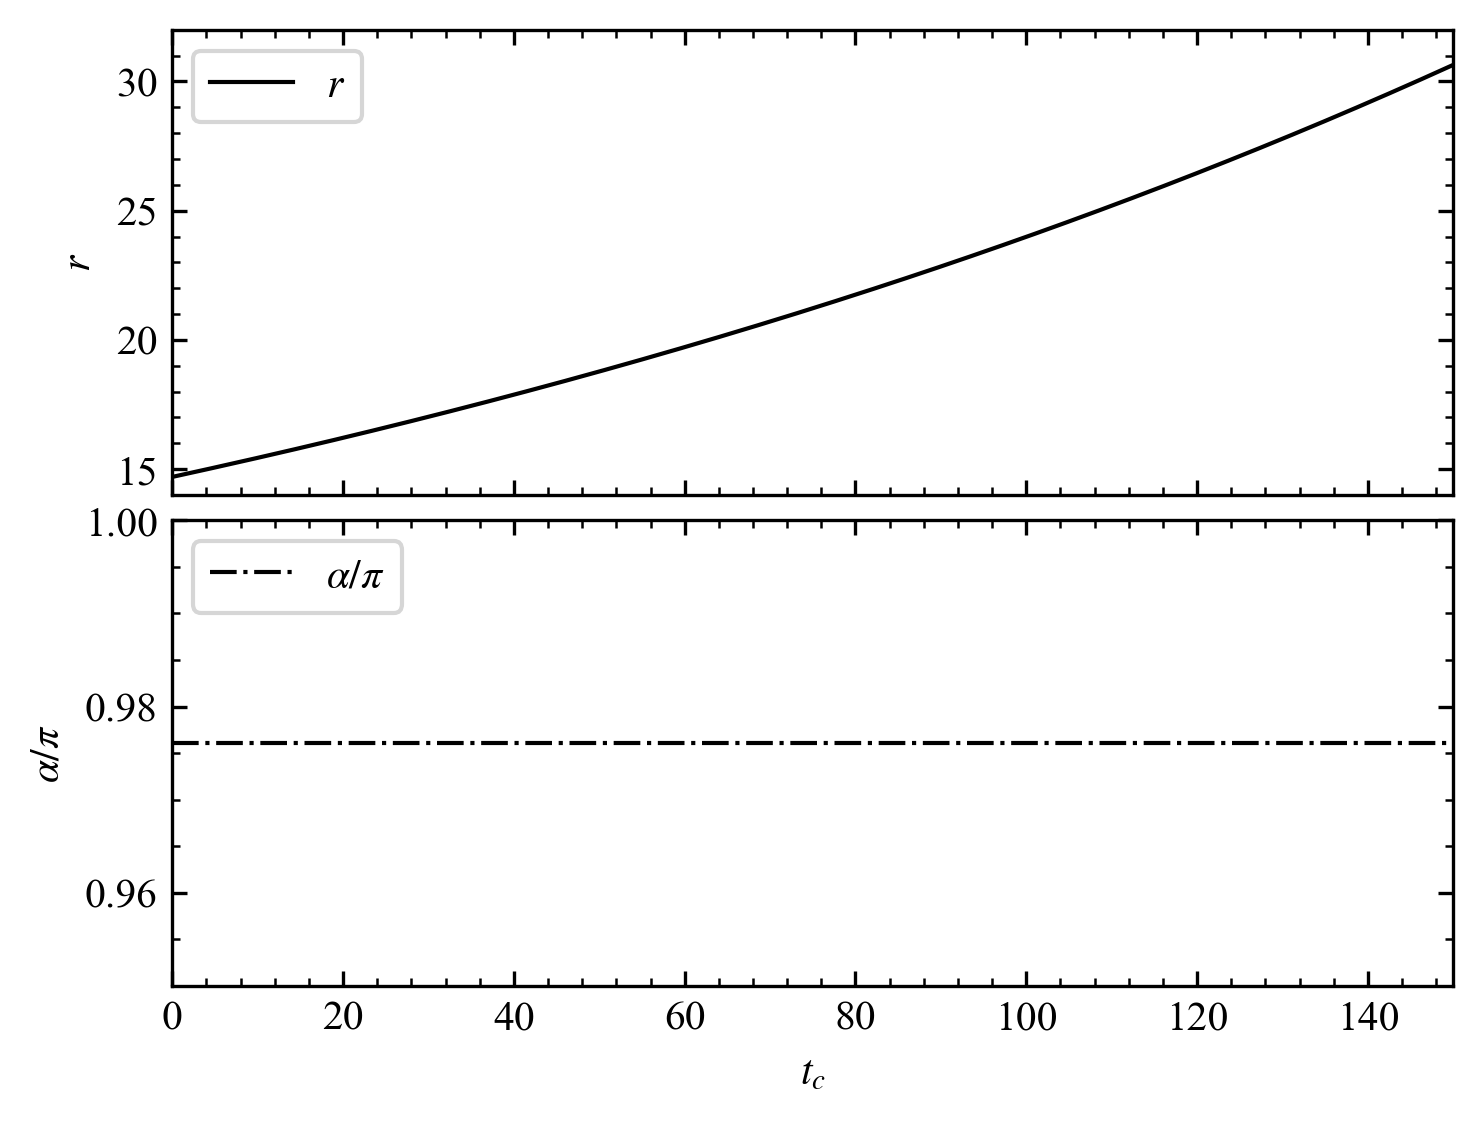

In [9]:
plt.figure(figsize=(4.8,3.6), dpi=300)

plt.subplot(211)
plt.plot(tc,np.sqrt(tmppxy[:,0]**2 + tmppxy[:,1]**2),'k',lw=1,label=r'$r$')
plt.legend(loc=2)

plt.xlim(tc[0],tc[-1])
plt.ylim(14,32)

plt.xticks(ticks=np.arange(0,tc[-1],20),labels=[])

# 显示四周坐标刻度
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
# 设置副坐标刻度间隔
# plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.gca().xaxis.set_minor_locator(MultipleLocator(4))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
# xy主坐标刻度朝内
plt.gca().tick_params(axis="both", which="major", direction="in")
# xy副坐标刻度朝内
plt.gca().tick_params(axis="both", which="minor", direction="in")


plt.ylabel(r'$r$')

plt.subplot(212)
plt.plot(tc,np.atan2(tmppxy[:,1],tmppxy[:,0])/np.pi,'k-.',lw=1,label=r'$\alpha/\pi$')
plt.legend(loc=2)

plt.xlim(tc[0],tc[-1])
plt.ylim(.95,1)

# 显示四周坐标刻度
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
# 设置副坐标刻度间隔
plt.gca().xaxis.set_minor_locator(MultipleLocator(4))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.005))
# xy主坐标刻度朝内
plt.gca().tick_params(axis="both", which="major", direction="in")
# xy副坐标刻度朝内
plt.gca().tick_params(axis="both", which="minor", direction="in")

plt.xlabel(r'$t_c$')
plt.ylabel(r'$\alpha/\pi$')

# 调整子图参数 - 使其充满整个画布
plt.tight_layout(pad=.2)

plt.show()

# plt.savefig("imgs/r_alpha_tc.png")